In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

In [6]:
data = pd.read_csv("../data/tables/CyCOG_95_completeness.csv")
data.set_index("name", inplace=True)
mat = data.values

In [7]:
k = 3
km = KMeans(n_clusters=k)
km.fit(mat)
labels = km.labels_
results = pd.DataFrame([data.index, labels]).T
results.columns=("Genome", "K-group")
results.to_csv(f"../data/tables/{k}-means.csv", index=False)

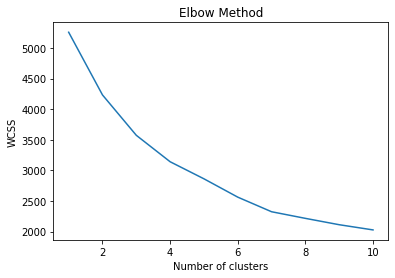

In [4]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(mat)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(50, 15))

cmap = mpl.colors.ListedColormap(['w', 'b'])
bounds = [0., 0.5, 1.]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

ax.imshow(plot_table, interpolation='none', cmap=cmap, norm=norm, aspect="auto")
yticks = plt.yticks(range(plot_table.shape[0]), plot_table.index)

# Uncomment this if you wish COG names in the xticks
xticks = plt.xticks(range(plot_table.shape[1]), plot_table.columns, rotation=90)

# Uncomment to save
plt.savefig("../data/plots/CyCOG_presence_absence.png", dpi=700, bbox_inches='tight')